# Final Project

## Step 1: Migration Data Download

In [2]:
# Import needed Python libraries
import time
import zipfile
from getpass import getpass
from glob import glob

import pygbif.occurrences as occ
import pygbif.species as species
import requests

# Python Standard Library Packages
import os
import pathlib

# Other Packages
import earthpy # Manage local data
import pandas as pd # Work with tabular data
import geopandas as gpd # Work with geospatial vector data
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Get month names
import calendar

# Libraries for Dynamic mapping
import cartopy.crs as ccrs
import hvplot.pandas
import panel as pn


In [3]:
# Create data directory
data_dir = os.path.join(

    ### Home directory
    pathlib.Path.home(),

    ### Make folders
    'earth-analytics',
    'data',

    ### Project directory for this assignment
    'final-hummbird', 
)

## Make the path
os.makedirs(data_dir, exist_ok=True)


## STEP 2: Register and log in to GBIF

In [4]:
####--------------------------####
#### DO NOT MODIFY THIS CODE! ####
####--------------------------####
# This code ASKS for your credentials 
# and saves it for the rest of the session.
# NEVER put your credentials into your code!!!!

# GBIF needs a username, password, and email 
# All 3 need to match the account
reset = True

# Request and store username
if (not ('GBIF_USER'  in os.environ)) or reset:
    os.environ['GBIF_USER'] = input('GBIF username:')

# Securely request and store password
if (not ('GBIF_PWD'  in os.environ)) or reset:
    os.environ['GBIF_PWD'] = getpass('GBIF password:')
    
# Request and store account email address
if (not ('GBIF_EMAIL'  in os.environ)) or reset:
    os.environ['GBIF_EMAIL'] = input('GBIF email:')

## STEP 3: Get the taxon key from GBIF

One of the tricky parts about getting occurrence data from GBIF is that
species often have multiple names in different contexts. Luckily, GBIF
also provides a Name Backbone service that will translate scientific and
colloquial names into unique identifiers. GBIF calls these identifiers
**taxon keys**. 



In [5]:
## Get the 2 distinct species key from GBIF 
backbone_ruby = species.name_backbone(name='Archilochus colubris')
backbone_broad = species.name_backbone(name='Selasphorus platycercus')
backbone_chin = species.name_backbone(name='Archilochus alexandris')

species_key_ruby = backbone_ruby['usageKey']
species_key_broad = backbone_broad['usageKey']
species_key_chin = backbone_chin['usageKey']

# Retrieve usage key and confirm existence
print("The usage key for Ruby is: " , species_key_ruby)
print("The usage key for Broad-Tail is: ", species_key_broad)
print("The usage key for Black-Chin is: ", species_key_chin)

The usage key for Ruby is:  5228514
The usage key for Broad-Tail is:  2476844
The usage key for Black-Chin is:  5228513


## STEP 4: Download data from GBIF

Downloading GBIF data is a multi-step process. 

For this final project, we will be using two different species of hummingbird, so will need to run this information twice.

In [6]:
# Create data directory
ruby_dir = os.path.join(

    ### Home directory
    pathlib.Path.home(),

    ### Make folders
    'earth-analytics',
    'data',

    ### Project directory for this assignment
    'final-hummbird', 
    'ruby'
)

## Make the path
os.makedirs(ruby_dir, exist_ok=True)

In [7]:
# Only download once
gbif_pattern_ruby = os.path.join(ruby_dir, '*.csv')

if not glob(gbif_pattern_ruby):
    
    # Only submit one request
    if not 'GBIF_DOWNLOAD_KEY' in os.environ:
        # Submit query to GBIF
        gbif_query = occ.download([
            f"taxonKey = {species_key_ruby}",
            "hasCoordinate = True",
            f"year = 2024",
        ])
        # Take first result
        os.environ['GBIF_DOWNLOAD_KEY'] = gbif_query[0]

    # Wait for the download to build
    dld_key = os.environ['GBIF_DOWNLOAD_KEY']

    # use the occurrence command module in pygbif to get the metadata
    wait = occ.download_meta(dld_key)['status']

    # check if the status of the download = "SUCCEEDED"
    # wait and loop through until it finishes
    while not wait=='SUCCEEDED':
        wait = occ.download_meta(dld_key)['status']
        time.sleep(5)

    # Download GBIF data
    dld_info = occ.download_get(
        os.environ['GBIF_DOWNLOAD_KEY'], 
        path=ruby_dir)
    dld_path = dld_info['path']

    # Unzip GBIF data
    with zipfile.ZipFile(dld_path) as dld_zip:
        dld_zip.extractall(path=ruby_dir)
        
    # Clean up the .zip file
    os.remove(dld_path)

    

else: print("Done!") # If file already exists in folder    

# Find the extracted .csv file path (first result)
gbif_path_ruby = glob(gbif_pattern_ruby)[0]

#Rename the file to a descriptive name
csv_filename = os.path.basename(gbif_path_ruby)

ruby_gbif = "ruby-gbif.csv"
new_path1 = os.path.join(ruby_dir, ruby_gbif)

os.rename(gbif_path_ruby, new_path1)

print(f"Renamed {csv_filename} → {ruby_gbif}")

Done!
Renamed ruby-gbif.csv → ruby-gbif.csv


In [8]:
# Create data directory
broad_dir = os.path.join(

    ### Home directory
    pathlib.Path.home(),

    ### Make folders
    'earth-analytics',
    'data',

    ### Project directory for this assignment
    'final-hummbird', 
    'broad'
)

## Make the path
os.makedirs(broad_dir, exist_ok=True)

In [9]:
# Only download once
gbif_pattern_broad = os.path.join(broad_dir, '*.csv')

if not glob(gbif_pattern_broad):
    
    # Only submit one request
    if not 'GBIF_DOWNLOAD_KEY_1' in os.environ:
        # Submit query to GBIF
        gbif_query = occ.download([
            f"taxonKey = {species_key_broad}",
            "hasCoordinate = True",
            f"year = 2024",
        ])
        # Take first result
        os.environ['GBIF_DOWNLOAD_KEY_1'] = gbif_query[0]

    # Wait for the download to build
    dld_key = os.environ['GBIF_DOWNLOAD_KEY_1']

    # use the occurrence command module in pygbif to get the metadata
    wait = occ.download_meta(dld_key)['status']

    # check if the status of the download = "SUCCEEDED"
    # wait and loop through until it finishes
    while not wait=='SUCCEEDED':
        wait = occ.download_meta(dld_key)['status']
        time.sleep(5)

    # Download GBIF data
    dld_info = occ.download_get(
        os.environ['GBIF_DOWNLOAD_KEY_1'], 
        path=data_dir)
    dld_path = dld_info['path']

    # Unzip GBIF data
    with zipfile.ZipFile(dld_path) as dld_zip:
        dld_zip.extractall(path=broad_dir)
        
    # Clean up the .zip file
    os.remove(dld_path)

    

else: print("Done!") # If file already exists in folder    

# Find the extracted .csv file path (first result)
gbif_path_broad = glob(gbif_pattern_broad)[0]

#Rename the file to a descriptive name
csv_filename = os.path.basename(gbif_path_broad)

broad_gbif = "broad-gbif.csv"
new_path2 = os.path.join(broad_dir, broad_gbif)

os.rename(gbif_path_broad, new_path2)

print(f"Renamed {csv_filename} → {broad_gbif}")

Done!
Renamed broad-gbif.csv → broad-gbif.csv


## Step 5: Define Study Area: Ecoregions of North America and import GBIF data

In this section:
- Collect the directy for the ecoregion of North America and ensure it is plotting correctly
- Load the collected GBIF data into the notebook as a dataframe
- Change the data from a data frame (DF) to a geodatafram (GDF)

In [10]:
### Get url for ecoregions
eco_url = ("https://storage.googleapis.com/"
       "teow2016/Ecoregions2017.zip")

### Make them machine readable
eco_dir = os.path.join(data_dir, "ecoregions")

### Make the ecoregions directory
os.makedirs(eco_dir, exist_ok = True)

### Join ecoregions shapefile path
eco_path = os.path.join(eco_dir, "ecoregions.shp")

### Download the data (once)
if not os.path.exists(eco_path):
    eco_gdf = gpd.read_file(eco_url)
    eco_gdf.to_file(eco_path)

<Axes: >

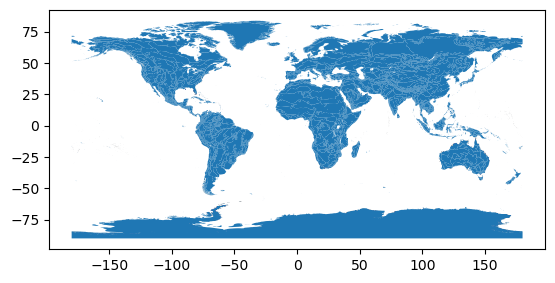

In [11]:
# Open up the ecoregions boundaries
eco_gdf = (
    gpd.read_file(eco_path)
    [['OBJECTID', 'ECO_NAME', 'SHAPE_AREA', 'geometry' ]]
   
)
    
# Plot the ecoregions quickly to check download
eco_gdf.plot()

In [12]:
#View the data
eco_gdf.head()

OBJECTID                                           ECO_NAME  SHAPE_AREA  \
0       1.0                                 Adelie Land tundra    0.038948   
1       2.0             Admiralty Islands lowland rain forests    0.170599   
2       3.0  Aegean and Western Turkey sclerophyllous and m...   13.844952   
3       4.0                       Afghan Mountains semi-desert    1.355536   
4       5.0                   Ahklun and Kilbuck Upland Tundra    8.196573   

                                            geometry  
0  MULTIPOLYGON (((158.7141 -69.60657, 158.71264 ...  
1  MULTIPOLYGON (((147.28819 -2.57589, 147.2715 -...  
2  MULTIPOLYGON (((26.88659 35.32161, 26.88297 35...  
3  MULTIPOLYGON (((65.48655 34.71401, 65.52872 34...  
4  MULTIPOLYGON (((-160.26404 58.64097, -160.2673...

In [13]:
# Check that files were extracted into the correct directory
print("Files in directory after extraction:", os.listdir(data_dir))
print("Ruby folder:", os.listdir(ruby_dir))
print("Broad folder:", os.listdir(broad_dir))

Files in directory after extraction: ['ruby', 'ecoregions', 'broad']
Ruby folder: ['ruby-gbif.csv']
Broad folder: ['broad-gbif.csv']


In [39]:

### Get url for ecoregions
eco_6_url = ("https://dmap-prod-oms-edc.s3.us-east-1.amazonaws.com/ORD/Ecoregions/reg6/reg6_eco_l3.zip"
       )

### Make them machine readable
eco_6_dir = os.path.join(data_dir, "ecoregions6")

### Make the ecoregions directory
os.makedirs(eco_6_dir, exist_ok = True)

### Join ecoregions shapefile path
eco_6_path = os.path.join(eco_6_dir, "reg6_eco_l3.shp")

### Download the data (once)
if not os.path.exists(eco_6_path):
    eco_6_gdf = gpd.read_file(eco_6_url)
    eco_6_gdf.to_file(eco_6_path)


In [69]:
eco_8_url = ("https://dmap-prod-oms-edc.s3.us-east-1.amazonaws.com/ORD/Ecoregions/reg8/reg8_eco_l3.zip")

### Make them machine readable
eco_8_dir = os.path.join(data_dir, "ecoregions8")

### Make the ecoregions directory
os.makedirs(eco_8_dir, exist_ok = True)

### Join ecoregions shapefile path
eco_8_path = os.path.join(eco_8_dir, "reg8_eco_l3.shp")

### Download the data (once)
if not os.path.exists(eco_8_path):
    eco_8_gdf = gpd.read_file(eco_8_url)
    eco_8_gdf.to_file(eco_8_path)

/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 82269072894.699997 of field Shape_Area of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1950184591.6800001 of field Shape_Area of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 29122283008.200001 of field Shape_Area of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 5296228512.7700005 of field Shape_Area of feature 5 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: 

In [70]:
eco_8_gdf.head()

US_L3CODE                US_L3NAME NA_L3CODE  \
0        12        Snake River Plain    10.1.8   
1        13  Central Basin and Range    10.1.5   
2        14   Mojave Basin and Range    10.2.1   
3        15         Northern Rockies     6.2.3   
4        16          Idaho Batholith    6.2.15   

                             NA_L3NAME NA_L2CODE           NA_L2NAME  \
0                    Snake River Plain      10.1        COLD DESERTS   
1              Central Basin and Range      10.1        COLD DESERTS   
2               Mojave Basin and Range      10.2        WARM DESERTS   
3  Columbia Mountains/Northern Rockies       6.2  WESTERN CORDILLERA   
4                      Idaho Batholith       6.2  WESTERN CORDILLERA   

  NA_L1CODE                        NA_L1NAME STATE_NAME  EPA_REGION  \
0        10           NORTH AMERICAN DESERTS    Wyoming           8   
1        10           NORTH AMERICAN DESERTS       Utah           8   
2        10           NORTH AMERICAN DESERTS       Utah           8   
3         6  NORTHWESTERN FORESTED MOUNTAINS    Montana           8   
4         6  NORTHWESTERN FORESTED MOUNTAINS    Montana           8   

                        L3_KEY                   L2_KEY  \
0        12  Snake River Plain       10.1  COLD DESERTS   
1  13  Central Basin and Range       10.1  COLD DESERTS   
2   14  Mojave Basin and Range       10.2  WARM DESERTS   
3         15  Northern Rockies  6.2  WESTERN CORDILLERA   
4          16  Idaho Batholith  6.2  WESTERN CORDILLERA   

                               L1_KEY    Shape_Leng    Shape_Area  \
0          10  NORTH AMERICAN DESERTS  3.048079e+04  2.998087e+07   
1          10  NORTH AMERICAN DESERTS  1.884163e+06  8.226907e+10   
2          10  NORTH AMERICAN DESERTS  2.392012e+05  1.950185e+09   
3  6  NORTHWESTERN FORESTED MOUNTAINS  1.147075e+06  2.912228e+10   
4  6  NORTHWESTERN FORESTED MOUNTAINS  1.959632e+03  2.373682e+05   

                                            geometry  
0  POLYGON ((-1202710.657 2395947.963, -1202705.1...  
1  POLYGON ((-1373196.619 2231035.62, -1373090.99...  
2  POLYGON ((-1564408.121 1735198.574, -1564336.8...  
3  POLYGON ((-1394930.775 3014349.817, -1394410.4...  
4  POLYGON ((-1424255.375 2779017.836, -1424349.2...

<Axes: >

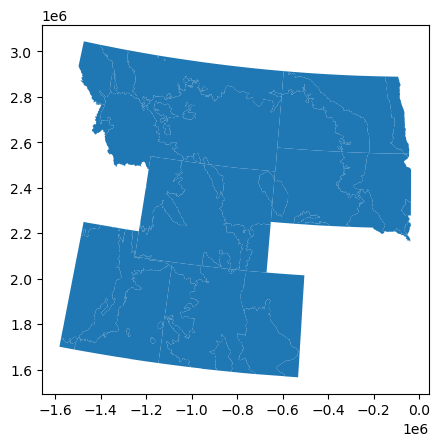

In [71]:
# Open up the ecoregions boundaries
eco_8_gdf = (
    gpd.read_file(eco_8_path)
    [['US_L3CODE', 'US_L3NAME', 'Shape_Area', 'geometry' ]]
   
)
    
# Plot the ecoregions quickly to check download
eco_8_gdf.plot()

## Step 6: Load GBIF dataframe and turn into geodataframes

In [43]:
# Load the GBIF dataframe
gbif_ruby_df = pd.read_csv(
    new_path1,
    delimiter = '\t',
    index_col='gbifID',
    usecols = ['gbifID', 'decimalLatitude', 'decimalLongitude', 'month'])

### Check out data
gbif_ruby_df.head()

decimalLatitude  decimalLongitude  month
gbifID                                              
4948005334        41.315200        -72.920300    9.0
5159684301        41.303649        -72.927627    9.0
4950101970        39.365147        -86.508346    9.0
4910889783        41.400784        -81.887628    5.0
4867924503        20.501114        -86.944814    4.0

In [44]:
# Load the GBIF dataframe


gbif_broad_df = pd.read_csv(
    new_path2,
    delimiter = '\t',
    index_col='gbifID',
    usecols = ['gbifID', 'decimalLatitude', 'decimalLongitude', 'month'])

### Check out data
gbif_broad_df.head()

decimalLatitude  decimalLongitude  month
gbifID                                              
5196098037        39.747056       -105.227654     10
5196098277        39.581335       -104.978674      8
5196115619        39.836765       -105.090057      6
5196115622        39.577505       -105.303160      6
5196115680        40.357246       -105.549468      5

In [45]:
## Convert GBIF data to GDF
gbif_ruby_gdf = (
    gpd.GeoDataFrame(
        gbif_ruby_df, 
        geometry=gpd.points_from_xy(
            gbif_ruby_df.decimalLongitude, 
            gbif_ruby_df.decimalLatitude), 
        crs="EPSG:4326") #Using latitude and longitude in degrees
    # Select the desired columns
    [['month', 'geometry']]
)

# View the data
gbif_ruby_gdf

month                     geometry
gbifID                                        
4948005334    9.0     POINT (-72.9203 41.3152)
5159684301    9.0   POINT (-72.92763 41.30365)
4950101970    9.0   POINT (-86.50835 39.36515)
4910889783    5.0   POINT (-81.88763 41.40078)
4867924503    4.0   POINT (-86.94481 20.50111)
...           ...                          ...
5288307497   11.0  POINT (-104.81715 19.30815)
4882314484    5.0   POINT (-82.50931 41.91015)
4882844007    5.0   POINT (-82.51074 41.91552)
4605963338    2.0     POINT (-91.2229 14.5778)
5151716362   11.0     POINT (-96.6619 17.1248)

[457548 rows x 2 columns]

In [46]:
## Convert GBIF data to GDF
gbif_broad_gdf = (
    gpd.GeoDataFrame(
        gbif_broad_df, 
        geometry=gpd.points_from_xy(
            gbif_broad_df.decimalLongitude, 
            gbif_broad_df.decimalLatitude), 
        crs="EPSG:4326") #Using latitude and longitude in degrees
    # Select the desired columns
    [['month', 'geometry']]
)

# View the data
gbif_broad_gdf

month                     geometry
gbifID                                        
5196098037     10  POINT (-105.22765 39.74706)
5196098277      8  POINT (-104.97867 39.58134)
5196115619      6  POINT (-105.09006 39.83676)
5196115622      6   POINT (-105.30316 39.5775)
5196115680      5  POINT (-105.54947 40.35725)
...           ...                          ...
4907350423      7    POINT (-110.7147 32.4104)
4907345064      7    POINT (-110.7147 32.4104)
4605963377      2      POINT (-92.0825 15.156)
4605967380      2      POINT (-92.0825 15.156)
4940937149      8    POINT (-110.9179 42.7307)

[82390 rows x 2 columns]

In [ ]:
# Confirm the data is a Geo Data Frame
gbif_ruby_gdf.info()

In [ ]:
# Confirm the data is a Geo Data Frame
gbif_broad_gdf.info()

## Step 7: Consolidate dataframe data into ecoregion data

EPSG:5070
Ruby EPSG:4326
            month                     geometry
gbifID                                        
4948005334    9.0     POINT (-72.9203 41.3152)
5159684301    9.0   POINT (-72.92763 41.30365)
4950101970    9.0   POINT (-86.50835 39.36515)
4910889783    5.0   POINT (-81.88763 41.40078)
4867924503    4.0   POINT (-86.94481 20.50111)
...           ...                          ...
5288307497   11.0  POINT (-104.81715 19.30815)
4882314484    5.0   POINT (-82.50931 41.91015)
4882844007    5.0   POINT (-82.51074 41.91552)
4605963338    2.0     POINT (-91.2229 14.5778)
5151716362   11.0     POINT (-96.6619 17.1248)

[457548 rows x 2 columns]
Broad tailed EPSG:4326
            month                     geometry
gbifID                                        
5196098037     10  POINT (-105.22765 39.74706)
5196098277      8  POINT (-104.97867 39.58134)
5196115619      6  POINT (-105.09006 39.83676)
5196115622      6   POINT (-105.30316 39.5775)
5196115680      5  POINT (-105.5

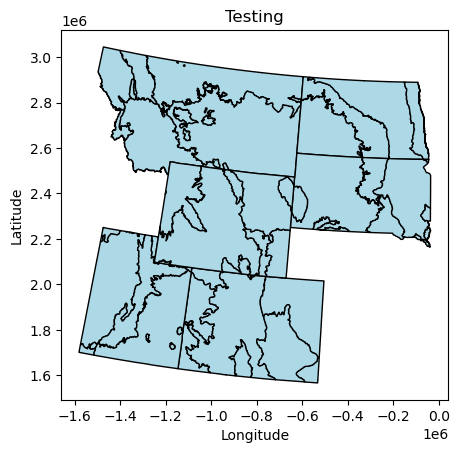

In [73]:
# Find out what CRS the data are in
print(eco_8_gdf.crs)

# Plot
eco_8_gdf.plot(
    color = "lightblue",
    edgecolor = "black"
)

# Give it labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Testing")

print("Ruby" , gbif_ruby_gdf.crs)

print(gbif_ruby_gdf)

print("Broad tailed" , gbif_broad_gdf.crs)

print(gbif_broad_gdf)

print(eco_gdf)

In [ ]:
gbif_eco_ruby_gdf = (
    eco_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_ruby_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_ruby_gdf,
        how = 'inner', 
        
        # only include ecoregions with gbif
        predicate='contains') # Using points and polygons

    # select columns we care about

eco-region  month
3           22    9.0
3           22    9.0
3           22    9.0
16          24    9.0
16          24    9.0
..         ...    ...
321         75   10.0
321         75   10.0
321         75    7.0
321         75    5.0
321         75    9.0

[43371 rows x 2 columns]

In [49]:
gbif_eco6_ruby_gdf = (
    eco_6_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_ruby_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_ruby_gdf,
        how = 'inner', 
        
        # only include ecoregions with gbif
        predicate='contains') # Using points and polygons

    # select columns we care about
    [['US_L3CODE', 'month']]
    .rename(columns = {'US_L3CODE': 'eco-region'})
)
gbif_eco6_ruby_gdf

eco-region  month
3           22    9.0
3           22    9.0
3           22    9.0
16          24    9.0
16          24    9.0
..         ...    ...
321         75   10.0
321         75   10.0
321         75    7.0
321         75    5.0
321         75    9.0

[43371 rows x 2 columns]

In [ ]:
gbif_eco_broad_gdf = (
    eco_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_broad_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_broad_gdf,
        how = 'inner', 
        
        # only include ecoregions with gbif
        predicate='contains') # Using points and polygons

    # select columns we care about
    [['OBJECTID', 'month']]
    .rename(columns = {'OBJECTID': 'eco-region'})
)
gbif_eco_broad_gdf

In [51]:
gbif_eco6_broad_gdf = (
    eco_6_gdf
    # Match the CRS of the GBIF data and the ecoregions
    .to_crs(gbif_broad_gdf.crs)
    # Find ecoregion for each observation
    .sjoin(
        gbif_broad_gdf,
        how = 'inner', 
        
        # only include ecoregions with gbif
        predicate='contains') # Using points and polygons

    # select columns we care about
    [['US_L3CODE', 'month']]
    .rename(columns = {'US_L3CODE': 'eco-region'})
)
gbif_eco6_broad_gdf

eco-region  month
0           20      5
0           20      5
0           20      5
0           20      8
0           20      5
..         ...    ...
326         79      7
326         79      9
326         79      9
326         79      9
326         79      4

[12374 rows x 2 columns]

In [52]:
gbif_eco6_ruby_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43371 entries, 3 to 321
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   eco-region  43371 non-null  object 
 1   month       43371 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1016.5+ KB


In [53]:
gbif_eco6_broad_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12374 entries, 0 to 326
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   eco-region  12374 non-null  object
 1   month       12374 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 290.0+ KB


## Step 8: Normalize hummingbird occurrences data

In [74]:
occurrence_ruby_df = (
    gbif_eco8_ruby_gdf

    # Ecoregions by month
    .groupby(['eco-region', 'month'])

    # Count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)

# Get rid of rare observations 
occurrence_ruby_df = occurrence_ruby_df[occurrence_ruby_df.occurrences > 1] # Only include occurences wiht more than one recorded

# Take the mean by ecoregion
mean_occurrences_ruby_by_ecoregion6 = (
    occurrence_ruby_df
    .groupby('eco-region')
    .mean()
)

# Take the mean by month
mean_occurrences_ruby_by_month = (
    occurrence_ruby_df
    .groupby('month')
    .mean()
)
mean_occurrences_ruby_by_month

### summarize occurrences
occurrence_ruby_df = (
    gbif_eco8_ruby_gdf
    # # Select only necessary columns
    # [[]]
    # For each ecoregion, for each month...
    .groupby(['eco-region', 'month'])
    # ...count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)
print(mean_occurrences_ruby_by_ecoregion8)

print(mean_occurrences_ruby_by_month)

NameError: name 'gbif_eco8_ruby_gdf' is not defined

In [ ]:
occurrence_broad_df = (
    gbif_eco8_broad_gdf

    # Ecoregions by month
    .groupby(['eco-region', 'month'])

    # Count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)

# Get rid of rare observations 
occurrence_broad_df = occurrence_broad_df[occurrence_broad_df.occurrences > 1] # Only include occurences wiht more than one recorded

# Take the mean by ecoregion
mean_occurrences_broad_by_ecoregion6 = (
    occurrence_broad_df
    .groupby('eco-region')
    .mean()
)
mean_occurrences_broad_by_ecoregion6

# Take the mean by month
mean_occurrences_broad_by_month = (
    occurrence_broad_df
    .groupby('month')
    .mean()
)
mean_occurrences_broad_by_month

### summarize occurrences
occurrence_broad_df = (
    gbif_eco6_broad_gdf
    # # Select only necessary columns
    # [[]]
    # For each ecoregion, for each month...
    .groupby(['eco-region', 'month'])
    # ...count the number of occurrences
    .agg(occurrences=('eco-region', 'count'))
)
print(mean_occurrences_broad_by_ecoregion6)

print(mean_occurrences_broad_by_month)

            occurrences
eco-region             
20            13.000000
21           464.666667
22           380.875000
23           241.727273
24           155.909091
25            15.333333
26            16.428571
27             2.000000
29             8.000000
30            15.000000
31             8.600000
32             3.000000
33             5.000000
34            26.571429
35             3.800000
73            26.500000
74             2.000000
75             3.500000
79            15.666667
       occurrences
month             
1        12.333333
2        12.333333
3        17.857143
4       157.111111
5       329.125000
6       320.600000
7       298.500000
8       274.375000
9       173.900000
10       51.555556
11        9.500000
12       16.142857


In [57]:
# Normalize by space and time for sampling effort
occurrence_ruby_df['norm_occurrences'] = (
    occurrence_ruby_df
    / mean_occurrences_ruby_by_month # Divide by monthly occurrences
    / mean_occurrences_ruby_by_ecoregion6 # Divide by ecoregion occurrences
)
occurrence_ruby_df

occurrences  norm_occurrences
eco-region month                               
22         9.0              3          0.002214
24         4.0              9          0.000537
           5.0              8          0.001008
           8.0             36          0.004578
           9.0             66          0.005108
...                       ...               ...
75         8.0             72          0.003433
           9.0            237          0.006878
           10.0           115          0.009807
           11.0            17          0.001757
           12.0             1          0.000144

[178 rows x 2 columns]

In [58]:
# Normalize by space and time for sampling effort
occurrence_broad_df['norm_occurrences'] = (
    occurrence_broad_df
    / mean_occurrences_broad_by_month # Divide by monthly occurrences
    / mean_occurrences_broad_by_ecoregion6 # Divide by ecoregion occurrences
)
occurrence_broad_df

occurrences  norm_occurrences
eco-region month                               
20         4                2          0.000979
           5               24          0.005609
           6                1          0.000240
           7                1          0.000258
           8                1          0.000280
...                       ...               ...
79         4               35          0.014220
           5               13          0.002521
           7                2          0.000428
           8               18          0.004187
           9               24          0.008809

[111 rows x 2 columns]

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['22', '24', '24', '24', '24', '24', '25', '25', '25', '25', '25',
       '25', '26', '27', '27', '27', '27', '27', '27', '27', '28', '28',
       '29', '29', '29', '29', '29', '29', '29', '29', '30', '30', '30',
       '30', '30', '30', '30', '30', '30', '30', '31', '31', '31', '31',
       '31', '31', '31', '31', '31', '32', '32', '32', '32', '32', '32',
       '32', '32', '32', '32', '32', '32', '33', '33', '33', '33', '33',
       '33', '33', '33', '33', '33', '33', '33', '34', '34', '34', '34',
       '34', '34', '34', '34', '34', '34', '34', '34', '35', '35', '35',
       '35', '35', '35', '35', '35', '35', '35', '35', '36', '36', '36',
       '36', '36', '36', '36', '36', '37', '37', '37', '37', '37', '37',
       '37', '37', '38', '38', '38', '38', '38', '38', '38', '38', '39',
       '39', '39', '39', '39', '39', '39', '40', '40', '40', '40', '40',
       '40', '40', '65', '65', '65', '65', '65', '65', '65', '65', '73',
       '73', '73', '73', '73', '73', '73', '73', '73', '73', '73', '73',
       '74', '74', '74', '74', '74', '74', '74', '74', '74', '74', '74',
       '74', '75', '75', '75', '75', '75', '75', '75', '75', '75', '75',
       '75', '75'], dtype=object)

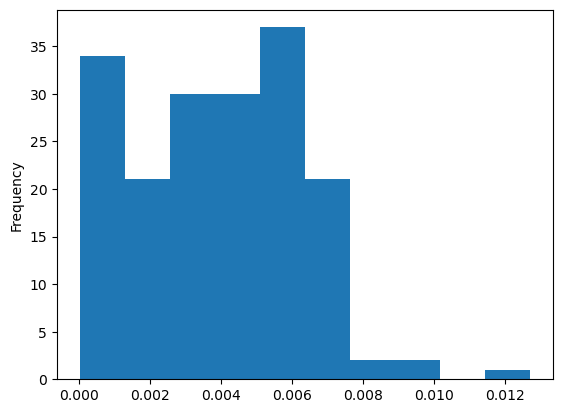

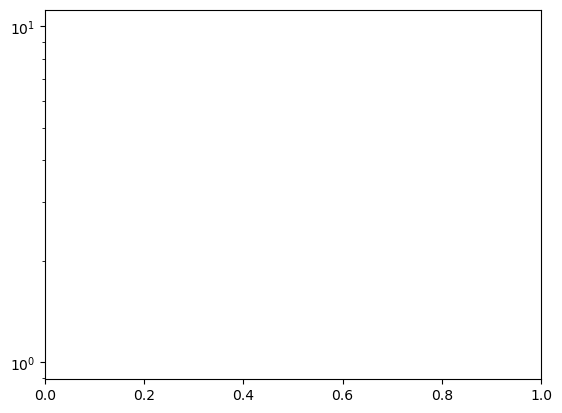

In [59]:
## Look at the data

# Histogram
occurrence_ruby_df.norm_occurrences.plot.hist()

# Scatterplot
occurrence_ruby_df.reset_index().plot.scatter(
    x = 'month',
    y = 'norm_occurrences',
    c = 'eco-region',
    logy = True
)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '21',
       '21', '21', '21', '22', '22', '22', '22', '22', '22', '22', '22',
       '22', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23',
       '23', '24', '24', '24', '24', '24', '24', '24', '24', '24', '24',
       '24', '25', '25', '25', '25', '25', '25', '25', '26', '26', '26',
       '26', '26', '26', '26', '27', '29', '29', '29', '30', '30', '30',
       '30', '30', '30', '30', '30', '30', '31', '31', '31', '31', '31',
       '31', '32', '32', '32', '33', '33', '33', '33', '34', '34', '34',
       '34', '34', '34', '34', '35', '35', '35', '35', '35', '35', '73',
       '73', '73', '73', '74', '75', '75', '79', '79', '79', '79', '79',
       '79'], dtype=object)

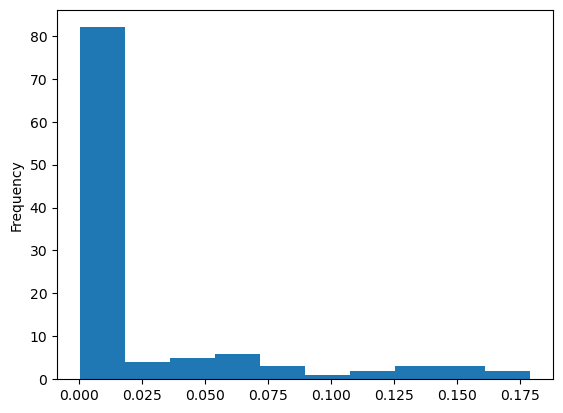

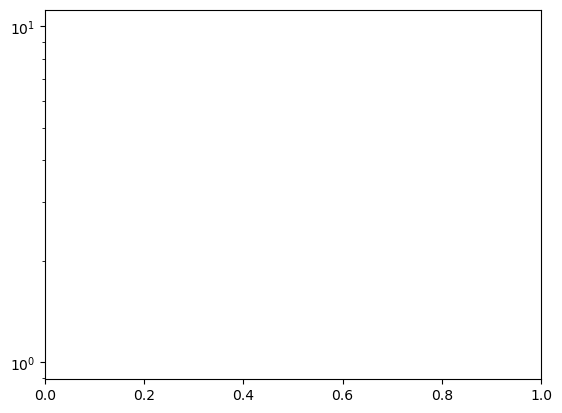

In [60]:
## Look at the data

# Histogram
occurrence_broad_df.norm_occurrences.plot.hist()

# Scatterplot
occurrence_broad_df.reset_index().plot.scatter(
    x = 'month',
    y = 'norm_occurrences',
    c = 'eco-region',
    logy = True
)

## Step 9: Make side by side visuals of occurrences

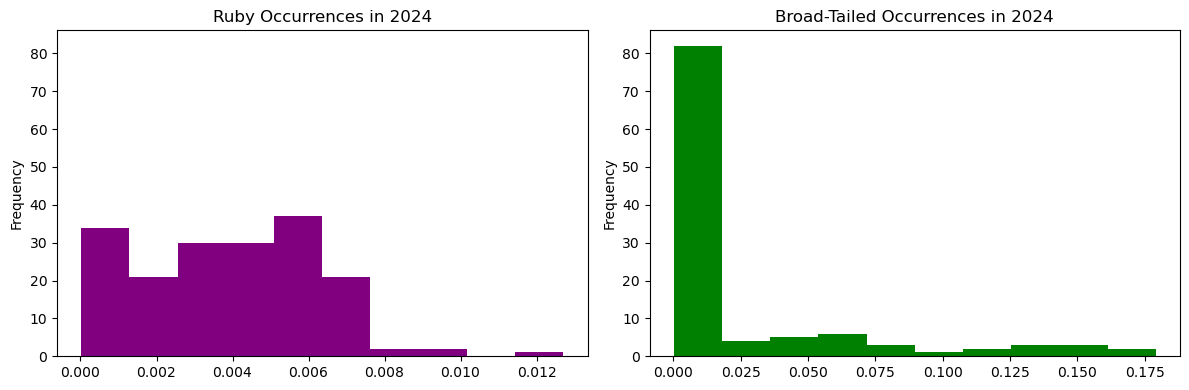

In [61]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12,4)) # 1 column and 2 rows

# Plot each in their own axes
occurrence_ruby_df.norm_occurrences.plot.hist(ax=axes[0], color ="purple").set_title("Ruby Occurrences in 2024")

occurrence_broad_df.norm_occurrences.plot.hist(ax=axes[1], color = "green").set_title("Broad-Tailed Occurrences in 2024"), 

ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

plt.tight_layout()
plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['22', '24', '24', '24', '24', '24', '25', '25', '25', '25', '25',
       '25', '26', '27', '27', '27', '27', '27', '27', '27', '28', '28',
       '29', '29', '29', '29', '29', '29', '29', '29', '30', '30', '30',
       '30', '30', '30', '30', '30', '30', '30', '31', '31', '31', '31',
       '31', '31', '31', '31', '31', '32', '32', '32', '32', '32', '32',
       '32', '32', '32', '32', '32', '32', '33', '33', '33', '33', '33',
       '33', '33', '33', '33', '33', '33', '33', '34', '34', '34', '34',
       '34', '34', '34', '34', '34', '34', '34', '34', '35', '35', '35',
       '35', '35', '35', '35', '35', '35', '35', '35', '36', '36', '36',
       '36', '36', '36', '36', '36', '37', '37', '37', '37', '37', '37',
       '37', '37', '38', '38', '38', '38', '38', '38', '38', '38', '39',
       '39', '39', '39', '39', '39', '39', '40', '40', '40', '40', '40',
       '40', '40', '65', '65', '65', '65', '65', '65', '65', '65', '73',
       '73', '73', '73', '73', '73', '73', '73', '73', '73', '73', '73',
       '74', '74', '74', '74', '74', '74', '74', '74', '74', '74', '74',
       '74', '75', '75', '75', '75', '75', '75', '75', '75', '75', '75',
       '75', '75'], dtype=object)

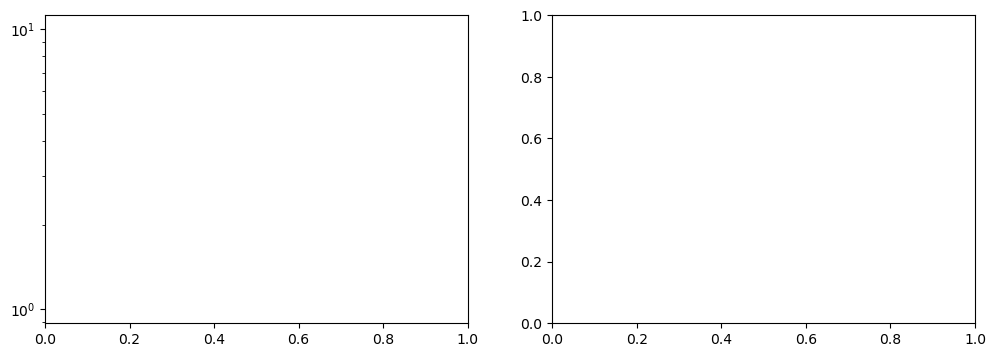

In [ ]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12,4)) # 1 column and 2 rows


# Scatterplot
occurrence_ruby_df.reset_index().plot.scatter(ax=axes[0],
    x = 'month',
    y = 'norm_occurrences',
    #c = 'eco-region',
    logy = True
).set_title("Ruby Occurrences in 2024")
# Scatterplot
occurrence_broad_df.reset_index().plot.scatter(ax=axes[1],
    x = 'month',
    y = 'norm_occurrences',
    c = 'eco-region').set_title("Broad-Tailed Occurrences in 2024")

ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

xmax = max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])
axes[0].set_xlim(0, xmax)
axes[1].set_xlim(0, xmax)

plt.tight_layout()
plt.show()

In [65]:
# Simplify the geometry to speed up processing
eco_6_gdf.geometry = eco_6_gdf.simplify(0.1, preserve_topology=False)


# Change the CRS to Mercator for mapping
eco_6_gdf = eco_6_gdf.to_crs(ccrs.Mercator())

# Check that the plot runs in a reasonable amount of time
eco_6_gdf.hvplot(geo=True, crs=ccrs.Mercator())

:Polygons   [Longitude,Latitude]

In [ ]:
## Rename eco_gdf to match occurrence_df
eco_gdf = eco_gdf.rename(columns = {'OBJECTID' : 'eco-region'})

## Merge ecoregio index
eco_gdf = eco_gdf.set_index('eco-region')
eco_gdf

In [66]:


# Join the occurrences with the plotting GeoDataFrame
occurrence_ruby_gdf = eco_6_gdf.join(occurrence_ruby_df)

# Get the plot bounds so they don't change with the slider
xmin, ymin, xmax, ymax = occurrence_ruby_gdf.total_bounds

# Calendar Name slider
month_widget = pn.widgets.DiscreteSlider(
    options={
        calendar.month_name[month_num]: month_num
        for month_num in range(1, 12)
        }
)




ValueError: cannot join with no overlapping index names

In [68]:
occurrence_ruby_df.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 178 entries, ('22', np.float64(9.0)) to ('75', np.float64(12.0))
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   occurrences       178 non-null    int64  
 1   norm_occurrences  178 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0+ KB


## Step 10: Make some maps of the data!

In [67]:
# Plot occurrence by ecoregion and month
migration_ruby_plot = (
    occurrence_ruby_gdf
    .hvplot(
      
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Ruby Throated Hummingbird Migration in 2024",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        widgets={'month': month_widget},
        widget_location='bottom' # location of slider
    )
)

# Save the plot
migration_ruby_plot.save('migration-ruby-final.html', embed=True)

migration_ruby_plot.show()

NameError: name 'occurrence_ruby_gdf' is not defined

In [ ]:
# Join the occurrences with the plotting GeoDataFrame
occurrence_broad_gdf = eco_gdf.join(occurrence_broad_df)

# Get the plot bounds so they don't change with the slider
xmin, ymin, xmax, ymax = occurrence_broad_gdf.total_bounds

# Calendar Name slider
month_widget = pn.widgets.DiscreteSlider(
    options={
        calendar.month_name[month_num]: month_num
        for month_num in range(1, 12)
        }
)

# Plot occurrence by ecoregion and month
migration_broad_plot = (
    occurrence_broad_gdf
    .hvplot(
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Broad-Tailed Hummingbird Migration in 2024",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        widgets={'month': month_widget},
        widget_location='bottom', # location of slider,
    )
)

# Save the plot
migration_broad_plot.save('migration-broad-final.html', embed=True)

migration_broad_plot.show()

In [ ]:
# Plot occurrence by ecoregion and month


migration_ruby_broad_plot = (
    
    occurrence_ruby_gdf
    .hvplot(
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Broad-Tailed Hummingbird Migration in 2024",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        widgets={'month': month_widget},
        widget_location='bottom', # location of slider,
    )

    
)

# Save the plot
#migration_ruby_broad_plot.save('migration-ruby-broad-final.html', embed=True)

migration_ruby_broad_plot.show()

In [ ]:
ruby_hv = migration_ruby_plot[0].object
broad_hv = migration_broad_plot[0].object


In [ ]:
#combined = ruby_hv * broad_hv

overlap = gpd.sjoin(occurrence_broad_gdf, occurrence_ruby_gdf, how="inner", predicate="intersects")
overlap = overlap.dropna()
#overlap

In [ ]:
overlap.hvplot(
    geo=True,
    size=8,
    color='red',
    alpha=0.7,
    tiles='OSM',
    legend=False,
    title="Overlap of Species A and B"
)

In [ ]:
import holoviews as hv
hv.extension('bokeh')

overlap_plot = overlap.hvplot(
    geo=True,
    size=8,
    color='red',
    alpha=0.5,   # transparency: 0.0=fully transparent, 1.0=opaque
    tiles='OSM',
    legend=False,
    title="Overlap Points with Transparency"
)
overlap_plot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
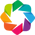

Invoked as <lambda>(month=np.float64(1.0))
Invoked as <lambda>(month=np.float64(1.0))


ValueError: Unexpected option 'alpha' for Overlay type across all extensions. Similar options for current extension ('bokeh') are: ['text_alpha'].

:DynamicMap   [month]

In [58]:
import holoviews as hv
hv.extension('bokeh')

month_dim = ruby_hv.kdims[0]  # usually 'month'

combined_dm = hv.DynamicMap(
    lambda month: (ruby_hv[month]*
                   broad_hv[month]
                  ).opts(
                      title='Ruby vs Broad-Tailed Occurrences in 2024',
                      width=800,
                      height=600,
                      alpha=0.5
                  ),
    kdims=[month_dim]
)

combined_dm



In [ ]:
gdf.groupby('month').apply(
    lambda df: df.hvplot.points(geo=True, alpha=0.5)
)

In [ ]:
hv.save(combined_dm, "ruby_vs_broad_interactive.html")

In [ ]:
ruby_hv.type

In [ ]:
combined_dm

In [ ]:
import rioxarray as rxr # To work with raster data
import xarray as xr # To work with data arrays and raster data

## Conclusion

## Works Cited 